In [82]:
# IMPORTS MINE:
import sounddevice as sd
import time as stime
import numpy as np
import matplotlib.pyplot as plt
import random


In [32]:
samplerate = 16000
DEFAULT_SAMPLE_RATE = 16000
sd.default.samplerate  = samplerate # defult samplerate for sounddevice library
sd.default.channels = 1

In [59]:
### my Functions:
def playsound(inputsound):
    if len(inputsound) == 1:
        sd.play(inputsound[0], DEFAULT_SAMPLE_RATE)
        stime.sleep(len(inputsound[0])/DEFAULT_SAMPLE_RATE)
        sd.stop()
    else:
        sd.play(inputsound, DEFAULT_SAMPLE_RATE)
        stime.sleep(len(inputsound)/DEFAULT_SAMPLE_RATE)
        sd.stop()


def Myspecplot(inputsound):
    if len(inputsound)==1:
        plot = plt.figure(figsize=(4, 4))
        powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(inputsound[0], Fs=DEFAULT_SAMPLE_RATE)
        plt.xlabel('Time')
        plt.ylabel('Frequency')
        return plot   
    else:
        plot = plt.figure(figsize=(4, 4))
        powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(inputsound, Fs=DEFAULT_SAMPLE_RATE)
        plt.xlabel('Time')
        plt.ylabel('Frequency')
        return plot

    
# record sound and returen one arrry object
def recorder(duration=5):
    #duration = 5  # seconds
    # defult sample rate is 1600
    rec_audio = sd.rec(int(duration * sd.default.samplerate))
    sd.wait()
    audio = []
    for i in rec_audio:
        audio.append(i[0])
    audio = np.array(audio) 
    return audio

# record sound and returen one arrry object
def recorder_simple(duration=5):
    
    #duration = 5  # seconds
    # defult sample rate is 1600
    recorded_audio = sd.rec(int(duration * sd.default.samplerate))
    sd.wait()
    return recorded_audio

def ploter(var):
    plt.figure()
    plt.title("Signal Wave...")
    plt.plot(var)
    plt.show()

In [54]:
audio = recorder_simple(2)

In [62]:
playsound(audio)

In [56]:
print(len(audio))

32000


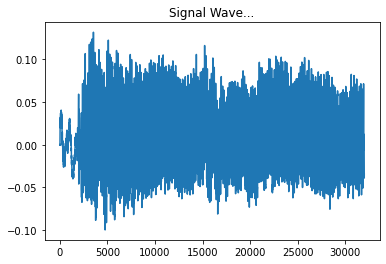

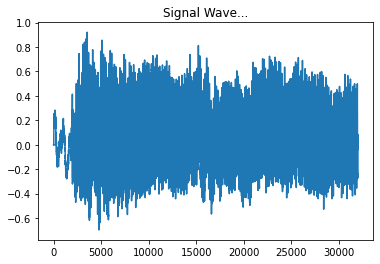

In [81]:
audio1 = audio * 7
ploter(audio1)
playsound(audio1)

In [ ]:
audio2 = []
for var in audio:
    audio2.append(var)
    audio2.append(random.choice(audio))
ploter(audio2)
playsound(audio2)
playsound(audio)